In [41]:
%pylab inline
from PIL import Image
from scipy.optimize import curve_fit
from IPython.display import Markdown, display
from sympy import pretty_print as pp, latex

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# 1. feladat

In [2]:
data1 = loadtxt('elsotemp.data')

In [3]:
# a felvett tavolsagok atlaga

avr = sum(data1) / len(data1)

# a felvett tavolsagok hibaja

davr = (sqrt(sum((data1-avr)**2)))/len(data1)

#davr = []

#for i in range(data1):
    #davr.append((sqrt((data1[i]-avr)**2)))
# az atlag standard hibaja

se = std(data1)

In [4]:
davr

0.005219994113294281

In [151]:
# lencse-ernyo tavolsag (cm), fokusztavolsag (cm)

D = 44
f = 2.7e-1

# hullamhossz (cm)

l = 632.8e-7

In [152]:
# fenyforras-ernyo relativ tavolsaga

rel_distance = D - f

theta1 = 0
theta2 = arctan(avr/rel_distance)

dtheta = theta2 -theta1

d = l/sin(dtheta) # = f tan(alpha)

alpha = arctan(d/f) * 360/(2*pi)

In [154]:
alpha

1.5528751534407907

In [ ]:
# 2. feladat

In [8]:
img1 = Image.open('figs/if0100.JPG')

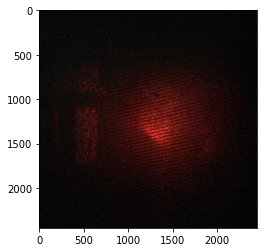

In [9]:
imshow(img1)

C =  0.363236337828247


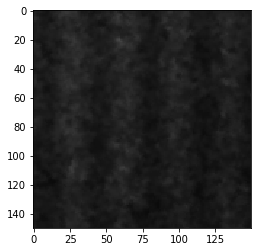

In [111]:
img1 = Image.open('figs/if0100.JPG').convert('L')
area = (1450, 1250, 1600, 1400)
cropped_img = img1.rotate(77).crop(area)
imshow(cropped_img)
#savefig('results/11.png')
a = []
b = []

for i in range(1,150):
    a.append(array(cropped_img)[i].max()-15)
    b.append(array(cropped_img)[i].min())

c = asarray(a) - asarray(b)
d = asarray(a) + asarray(b)

C = sum(c)/len(c)
D = sum(d)/len(d)

print("C = ", C/D)

C =  0.4720279720279721


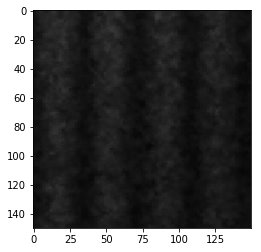

In [109]:
img1 = Image.open('figs/if0120.JPG').convert('L')
cropped_img = img1.rotate(77).crop(area)
imshow(cropped_img)
#savefig('results/12.png')
a = []
b = []

for i in range(1,150):
    a.append(array(cropped_img)[i].max()-15)
    b.append(array(cropped_img)[i].min())

c = asarray(a) - asarray(b)
d = asarray(a) + asarray(b)

C = sum(c)/len(c)
D = sum(d)/len(d)

print("C = ", C/D)

C =  0.4764908256880733


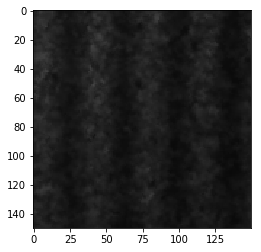

In [108]:
img1 = Image.open('figs/if0140.JPG').convert('L')
cropped_img = img1.rotate(77).crop(area)
imshow(cropped_img)
#savefig('results/13.png')
a = []
b = []

for i in range(1,150):
    a.append(array(cropped_img)[i].max()-15)
    b.append(array(cropped_img)[i].min())

c = asarray(a) - asarray(b)
d = asarray(a) + asarray(b)

C = sum(c)/len(c)
D = sum(d)/len(d)

print("C = ", C/D)

C =  0.16997956529816088


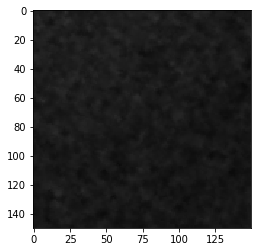

In [106]:
img1 = Image.open('figs/if0160.JPG').convert('L')
cropped_img = img1.rotate(77).crop(area)
imshow(cropped_img)
#savefig('results/14.png')
a = []
b = []

for i in range(1,150):
    a.append(array(cropped_img)[i].max()-15)
    b.append(array(cropped_img)[i].min())

c = asarray(a) - asarray(b)
d = asarray(a) + asarray(b)

C = sum(c)/len(c)
D = sum(d)/len(d)

print("C = ", C/D)

C =  0.24734982332155475


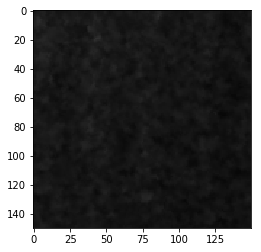

In [104]:
img1 = Image.open('figs/if0180.JPG').convert('L')
cropped_img = img1.rotate(77).crop(area)
imshow(cropped_img)
#savefig('results/15.png')
a = []
b = []

for i in range(1,150):
    a.append(array(cropped_img)[i].max()-15)
    b.append(array(cropped_img)[i].min())

c = asarray(a) - asarray(b)
d = asarray(a) + asarray(b)

C = sum(c)/len(c)
D = sum(d)/len(d)

print("C = ", C/D)

C =  0.15202231520223153


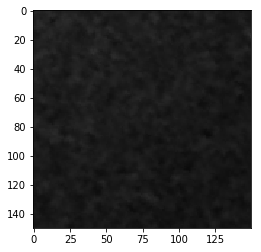

In [103]:
img1 = Image.open('figs/if0190.JPG').convert('L')
cropped_img = img1.rotate(77).crop(area)
imshow(cropped_img)
#savefig('results/16.png')

a = []
b = []

for i in range(1,150):
    a.append(array(cropped_img)[i].max()-15)
    b.append(array(cropped_img)[i].min())

c = asarray(a) - asarray(b)
d = asarray(a) + asarray(b)

C = sum(c)/len(c)
D = sum(d)/len(d)

print("C = ", C/D)

[0.0626838  0.11206589]
[0.44063411 0.59378085]


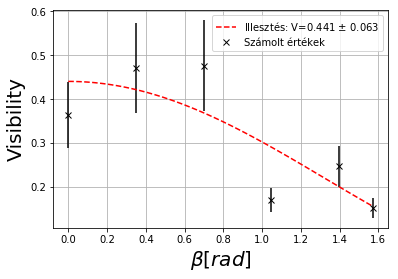

In [245]:
C = [0.363236337828247, 0.4720279720279721, 0.4764908256880733, 0.16997956529816088, 0.24734982332155475, 0.15202231520223153]
beta = [0*2*pi/360, 20*2*pi/360, 40*2*pi/360, 60*2*pi/360, 80*2*pi/360, 90*2*pi/360]

A = 1
B = 1
n = 1

def contrast(beta, A, B):
    return A * (cos(B*beta))**2

popt, pcov = curve_fit(contrast, beta, C, p0=[A,B])
perr = sqrt(diag(pcov))
print(perr)
print(popt)

Beta = linspace(0*2*pi/360,90*2*pi/360,90)

 
plot(Beta, contrast(Beta,*popt), 'r--', label = 'Illesztés: V=%5.3f $\\pm$ %5.3f' % (popt[0],perr[0]))
plot(beta, C, 'x', color = 'black', label = 'Számolt értékek')
errorbar(beta, C, (asarray(C)-perr[0])/4,ms= 6,c = 'black', linestyle = '')
xlabel('$\\beta [rad]$', fontsize = 20)
ylabel('Visibility', fontsize = 20)
grid()
legend()

#savefig('elsoillesztes.png', dpi = 200)

In [17]:
# 3. feladat

C =  0.44419281785829823


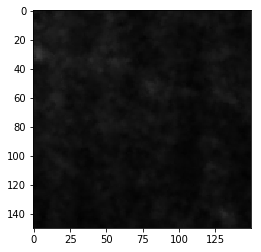

In [196]:
img1 = Image.open('figs/if0245.JPG').convert('L')
cropped_img = img1.rotate(77).crop(area)
imshow(cropped_img)
#savefig('results/245.png')
a = []
b = []

for i in range(1,150):
    a.append(array(cropped_img)[i].max()-15)
    b.append(array(cropped_img)[i].min())

c = asarray(a) - asarray(b)
d = asarray(a) + asarray(b)

C = sum(c)/len(c)
D = sum(d)/len(d)

print("C = ", C/D)

C =  0.2141772151898734


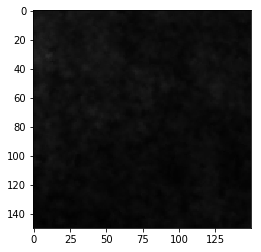

In [195]:
img1 = Image.open('figs/if0240.JPG').convert('L')
cropped_img = img1.rotate(77).crop(area)
imshow(cropped_img)
#savefig('results/240.png')
a = []
b = []

for i in range(1,150):
    a.append(array(cropped_img)[i].max()-15)
    b.append(array(cropped_img)[i].min())

c = asarray(a) - asarray(b)
d = asarray(a) + asarray(b)

C = sum(c)/len(c)
D = sum(d)/len(d)

print("C = ", C/D)

C =  0.3778280542986426


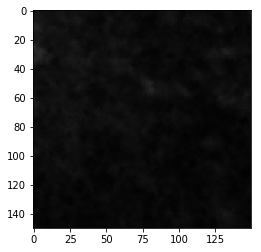

In [194]:
img1 = Image.open('figs/if0230.JPG').convert('L')
cropped_img = img1.rotate(77).crop(area)
imshow(cropped_img)
#savefig('results/230.png')
a = []
b = []

for i in range(1,150):
    a.append(array(cropped_img)[i].max()-15)
    b.append(array(cropped_img)[i].min())

c = asarray(a) - asarray(b)
d = asarray(a) + asarray(b)

C = sum(c)/len(c)
D = sum(d)/len(d)

print("C = ", C/D)

C =  0.5226143790849673


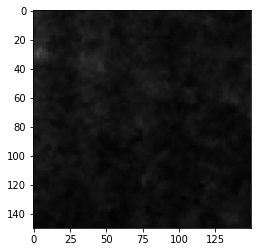

In [193]:
img1 = Image.open('figs/if0220.JPG').convert('L')
cropped_img = img1.rotate(77).crop(area)
imshow(cropped_img)
#savefig('results/220.png')
a = []
b = []

for i in range(1,150):
    a.append(array(cropped_img)[i].max()-15)
    b.append(array(cropped_img)[i].min())

c = asarray(a) - asarray(b)
d = asarray(a) + asarray(b)

C = sum(c)/len(c)
D = sum(d)/len(d)

print("C = ", C/D)

C =  0.5218823529411765


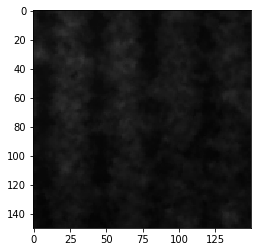

In [192]:
img1 = Image.open('figs/if0210.JPG').convert('L')
cropped_img = img1.rotate(77).crop(area)
imshow(cropped_img)
#savefig('results/210.png')
a = []
b = []

for i in range(1,150):
    a.append(array(cropped_img)[i].max()-15)
    b.append(array(cropped_img)[i].min())

c = asarray(a) - asarray(b)
d = asarray(a) + asarray(b)

C = sum(c)/len(c)
D = sum(d)/len(d)

print("C = ", C/D)

C =  0.6042828463082757


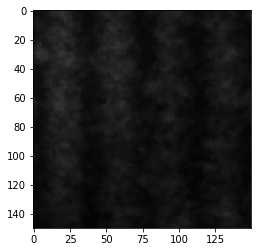

In [191]:
img1 = Image.open('figs/if0200.JPG').convert('L')
cropped_img = img1.rotate(77).crop(area)
imshow(cropped_img)
#savefig('results/200.png')
a = []
b = []

for i in range(1,150):
    a.append(array(cropped_img)[i].max()-15)
    b.append(array(cropped_img)[i].min())

c = asarray(a) - asarray(b)
d = asarray(a) + asarray(b)

C = sum(c)/len(c)
D = sum(d)/len(d)

print("C = ", C/D)

C =  0.57196261682243


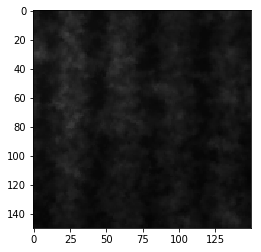

In [190]:
img1 = Image.open('figs/if0210_.JPG').convert('L')
cropped_img = img1.rotate(77).crop(area)
imshow(cropped_img)
#savefig('results/210_.png')
a = []
b = []

for i in range(1,150):
    a.append(array(cropped_img)[i].max()-15)
    b.append(array(cropped_img)[i].min())

c = asarray(a) - asarray(b)
d = asarray(a) + asarray(b)

C = sum(c)/len(c)
D = sum(d)/len(d)

print("C = ", C/D)

C =  0.5960921144452198


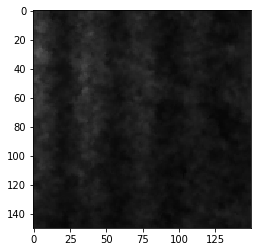

In [189]:
img1 = Image.open('figs/if0220_.JPG').convert('L')
cropped_img = img1.rotate(77).crop(area)
imshow(cropped_img)
#savefig('results/220_.png')
a = []
b = []

for i in range(1,150):
    a.append(array(cropped_img)[i].max()-15)
    b.append(array(cropped_img)[i].min())

c = asarray(a) - asarray(b)
d = asarray(a) + asarray(b)

C = sum(c)/len(c)
D = sum(d)/len(d)

print("C = ", C/D)

C =  0.4877353108956075


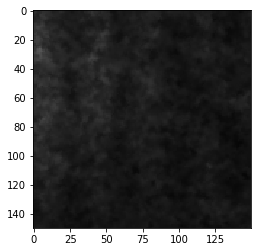

In [188]:
img1 = Image.open('figs/if0230_.JPG').convert('L')
cropped_img = img1.rotate(77).crop(area)
imshow(cropped_img)
#savefig('results/230_.png')
a = []
b = []

for i in range(1,150):
    a.append(array(cropped_img)[i].max()-15)
    b.append(array(cropped_img)[i].min())

c = asarray(a) - asarray(b)
d = asarray(a) + asarray(b)

C = sum(c)/len(c)
D = sum(d)/len(d)

print("C = ", C/D)

C =  0.5072391412880679


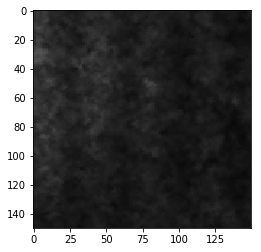

In [187]:
img1 = Image.open('figs/if0240_.JPG').convert('L')
cropped_img = img1.rotate(77).crop(area)
imshow(cropped_img)
#savefig('results/240_.png')
a = []
b = []

for i in range(1,150):
    a.append(array(cropped_img)[i].max()-15)
    b.append(array(cropped_img)[i].min())

c = asarray(a) - asarray(b)
d = asarray(a) + asarray(b)

C = sum(c)/len(c)
D = sum(d)/len(d)

print("C = ", C/D)

C =  0.4751322751322752


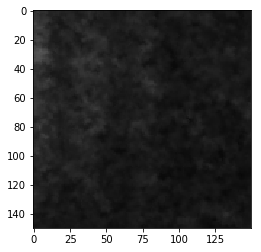

In [186]:
img1 = Image.open('figs/if0245_.JPG').convert('L')
cropped_img = img1.rotate(77).crop(area)
imshow(cropped_img)
#savefig('results/245_.png')
a = []
b = []

for i in range(1,150):
    a.append(array(cropped_img)[i].max()-15)
    b.append(array(cropped_img)[i].min())

c = asarray(a) - asarray(b)
d = asarray(a) + asarray(b)

C = sum(c)/len(c)
D = sum(d)/len(d)

print("C = ", C/D)

[0.04647875 0.16101505]
[0.5655708 0.7532692]


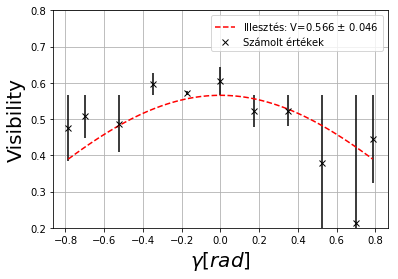

In [230]:
figsize(6,4)

V = [0.44419281785829823, 0.2141772151898734, 0.3778280542986426, 0.5226143790849673, 0.5218823529411765, 0.6042828463082757, 0.57196261682243, 0.5960921144452198, 0.4877353108956075, 0.5072391412880679, 0.4751322751322752]
gamma = [45 * 2*pi/360, 40 * 2*pi/360, 30 * 2*pi/360, 20 * 2*pi/360, 10 * 2*pi/360, 0 * 2*pi/360, -10 * 2*pi/360, -20 * 2*pi/360, -30 * 2*pi/360, -40 * 2*pi/360, -45 * 2*pi/360]

Gamma = linspace(-45*2*pi/360,45*2*pi/360,100)

popt, pcov = curve_fit(contrast, gamma, V, p0=[A,B])
perr = sqrt(diag(pcov))
print(perr)
print(popt)

plot(Gamma, contrast(Gamma,*popt), 'r--', label = 'Illesztés: V=%5.3f $\\pm$ %5.3f' % (popt[0],perr[0]))
plot(gamma, V, 'x', color = 'black', label = 'Számolt értékek')
errorbar(gamma, V, (asarray(V)-popt[0]),ms= 6,c = 'black', linestyle = '')
xlabel('$\\gamma [rad]$', fontsize = 20)
ylim(0.2,0.8)
ylabel('Visibility', fontsize = 20)
grid()
legend()

savefig('masodikillesztes.png', dpi = 200)